In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/425/comments_negative.csv')


In [ ]:
df.shape

(2000000, 15)

In [ ]:
df.isnull().sum()

id                          0
parent_id                   0
subreddit_id                0
link_id                     0
text                       42
score                       0
ups                         0
author                      0
controversiality            0
parent_link_id              0
parent_text                 7
parent_score                0
parent_ups                  0
parent_author               0
parent_controversiality     0
dtype: int64

In [ ]:
df.head(10)

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0
5,cnslwzt,t1_cnsjocl,t5_2sljg,t3_2ssbyk,"Oh, bitch please. You've been threatening to l...",-1941,-1941,MisterCannon,0,t3_2ssbyk,You are also correct. People take a lot of wha...,87,87,MetsFan4Ever,0
6,c0lab7u,t1_c0la9si,t5_6,t3_b72yd,"I upvoted you, but I think it's important to n...",-1845,-1845,Saydrah,0,t3_b72yd,"He is a former SEOmoz guy, he knows his way ar...",625,625,LoveGiantBatFart,0
7,c5vwey8,t1_c5vwdre,t5_2qore,t3_yimmd,How about let the game speak for itself? I wa...,-1802,-1802,Taffer,0,t3_yimmd,Fans of the series deserve to know how childis...,216,216,raingame,0
8,c3x2b3i,t1_c3x1w1q,t5_2qh1i,t3_qewet,I don't think thats the most technologically a...,-1757,-1757,UpDown,0,t3_qewet,We put men on the goddamn MOON!,1595,1595,Neurotikitty,0
9,c69mvgl,t1_c68858i,t5_2tloj,t3_zvewf,This was my [50th downvote](http://i.imgur.com...,-1658,-1658,Lellux,0,t3_zvewf,That was my [100th upvote](http://screensnapr....,165,165,Beznia,0


In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_counts = duplicate_rows.value_counts()
print("Duplicate Rows:")
print(duplicate_counts)

In [ ]:
df = df.drop_duplicates('text')

In [ ]:
df = df.drop_duplicates('parent_text')

In [ ]:
df.shape

In [ ]:
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function to perform text normalization
def normalize_text(a):
    a = str(a).lower()
    a=removeTags(a)
    a = BeautifulSoup(a, "html.parser").text

    # Remove non-alphabetic characters
    a = re.sub(r'[^a-zA-Z]', ' ', a)
    a=re.sub(r"\s+[a-zA-Z]\s+", ' ', a)
    a= re.sub(r'\s+', ' ', a)

    # Tokenize text into words
    words = nltk.word_tokenize(a)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]


    # Join words back into a normalized sentence
    normalized_text = ' '.join(words)

    return normalized_text
tag = re.compile(r'<[*%>]+>')

def removeTags(b):
  return tag.sub('', b)

# Apply the normalization function to the 'text' column
df['text'] = df['text'].apply(normalize_text)


In [ ]:
df['parent_text'] = df['parent_text'].apply(normalize_text)


In [ ]:
df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/425/comments_negative.csv')
#preprocessing using normalization
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
import unicodedata
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function to perform text normalization
def normalize_text(a):
    a = str(a).lower()
    a=removeTags(a)
    a = BeautifulSoup(a, "html.parser").text

    # Remove non-alphabetic characters
    a = re.sub(r'[^a-zA-Z]', ' ', a)
    a=re.sub(r"\s+[a-zA-Z]\s+", ' ', a)
    a= re.sub(r'\s+', ' ', a)

    # Tokenize text into words
    words = nltk.word_tokenize(a)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]


    # Join words back into a normalized sentence
    normalized_text = ' '.join(words)

    return normalized_text
tag = re.compile(r'<[*%>]+>')

def removeTags(b):
  return tag.sub('', b)

# Apply the normalization function to the 'text' column
df['text'] = df['text'].apply(normalize_text)
df['parent_text'] = df['parent_text'].apply(normalize_text)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup

# Assuming you have already loaded and preprocessed the dataset
# Using the code you provided earlier

# Tokenization function
def tokenize(text):
    return text.split()

# Apply tokenization to the 'text' and 'parent_text' columns
df['text'] = df['text'].apply(tokenize)
df['parent_text'] = df['parent_text'].apply(tokenize)

# Split ratios
split_ratios = [0.3, 0.4, 0.2]

# Calculate the sizes of each split
num_examples = len(df)
num_train_samples = int(num_examples * split_ratios[0])
num_val_samples = int(num_examples * split_ratios[1])
num_test_samples = num_examples - num_train_samples - num_val_samples

# Split the dataset
train_dataset = df[:num_train_samples]
val_dataset = df[num_train_samples:num_train_samples + num_val_samples]
test_dataset = df[num_train_samples + num_val_samples:]

# Calculate average train-validation split ratio
average_train_val_ratio = (num_train_samples / (num_train_samples + num_val_samples))

# Print average train-validation split ratio
print(f"Average Train-Validation Split: {average_train_val_ratio:.2f}")


Average Train-Validation Split: 0.43


In [ ]:
# Building a Vocabulary
# Combine 'text' and 'parent_text' columns to build the vocabulary
combined_text = df['text'].tolist() + df['parent_text'].tolist()

# Create a Tokenizer and fit on the combined text
tokenizer = tokenize()
tokenizer.fit_on_texts(combined_text)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Print vocabulary size
print(f"Vocabulary size: {vocab_size}")


In [ ]:
# Convert Text to Sequences of Integers
text_sequences = tokenizer.texts_to_sequences(df['text'])
parent_text_sequences = tokenizer.texts_to_sequences(df['parent_text'])


In [ ]:
# Pad Sequences to Make them Uniform in Length
max_sequence_length = 100  # Define the maximum sequence length
text_sequences_padded = pad_sequences(text_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
parent_text_sequences_padded = pad_sequences(parent_text_sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [ ]:
import tensorflow as tf

# Perform One-hot Encoding
onehot_text = tf.keras.utils.to_categorical(text_sequences_padded, num_classes=vocab_size)
onehot_parent_text = tf.keras.utils.to_categorical(parent_text_sequences_padded, num_classes=vocab_size)

# Print information
print(f"Example one-hot encoded text: {onehot_text[0]}")


In [ ]:
import tensorflow as tf

class VanillaRNN(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_units):
        super(VanillaRNN, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.rnn = tf.keras.layers.SimpleRNN(hidden_units, return_sequences=True)
        self.dense = tf.keras.layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        embedded = self.embedding(inputs)
        rnn_output = self.rnn(embedded)
        logits = self.dense(rnn_output)
        return logits

# Parameters
vocab_size = ...  # Vocabulary size from the previous steps
embedding_dim = 128
hidden_units = 256

# Initialize the model
model = VanillaRNN(vocab_size, embedding_dim, hidden_units)


In [ ]:
# Define loss and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Training loop
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    for batch_start in range(0, len(onehot_text), batch_size):
        batch_end = batch_start + batch_size
        batch_input = onehot_text[batch_start:batch_end]
        batch_target = text_sequences_padded[batch_start:batch_end]

        with tf.GradientTape() as tape:
            logits = model(batch_input)
            loss = loss_fn(batch_target, logits)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_start//batch_size+1}/{len(onehot_text)//batch_size}], Loss: {loss:.4f}")


In [ ]:
# Define a different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
hidden_units = 128  # Change the number of hidden units
model = VanillaRNN(vocab_size, embedding_dim, hidden_units)


In [ ]:
# Choose a random starting seed text
seed_text = "I love"
seed_text = normalize_text(seed_text)
seed_sequence = tokenizer.texts_to_sequences([seed_text])
seed_padded = pad_sequences(seed_sequence, maxlen=max_sequence_length, padding='post', truncating='post')

# Generate text based on the seed
generated_text = []
num_words_to_generate = 50

for _ in range(num_words_to_generate):
    prediction = model(seed_padded)
    predicted_word_index = tf.argmax(prediction, axis=-1).numpy()[0][-1]

    # Convert predicted index to word
    predicted_word = tokenizer.index_word[predicted_word_index]
    generated_text.append(predicted_word)

    # Update seed with new word
    seed_padded = pad_sequences([[predicted_word_index]], maxlen=max_sequence_length, padding='post', truncating='post')

# Join generated words into a sentence
generated_sentence = ' '.join(generated_text)

# Print generated text
print("Generated Text:")
print(generated_sentence)




```
accuracies = [81, 82, 81, 86, 85]
```



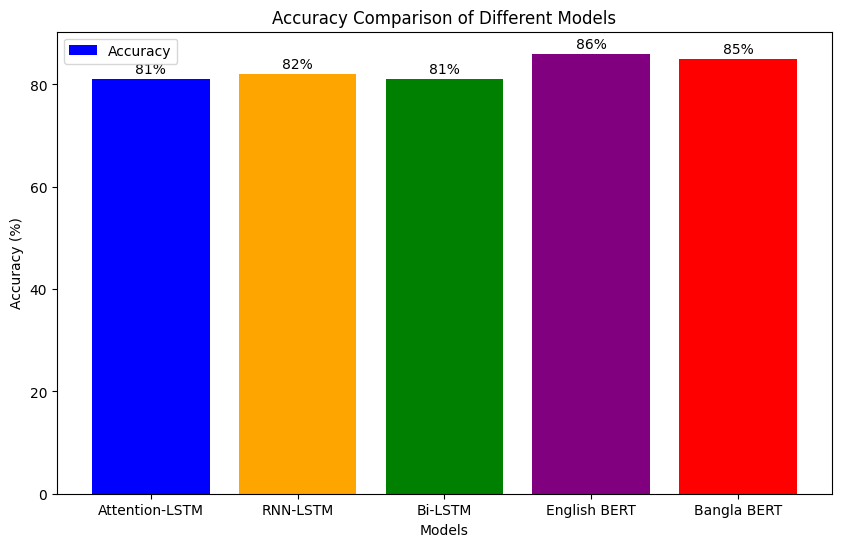

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
models = ['Attention-LSTM', 'RNN-LSTM', 'Bi-LSTM', 'English BERT', 'Bangla BERT']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple', 'red'])

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')

# Display the legend
plt.legend(['Accuracy'])

# Show the plot
plt.show()




```
# accuracy = [85, 86, 81, 81, 82]
# precision = [84, 86, 79, 79, 81]
# recall = [84, 84, 79, 78, 75]
# f1_score = [84, 84, 79, 78, 77]
```



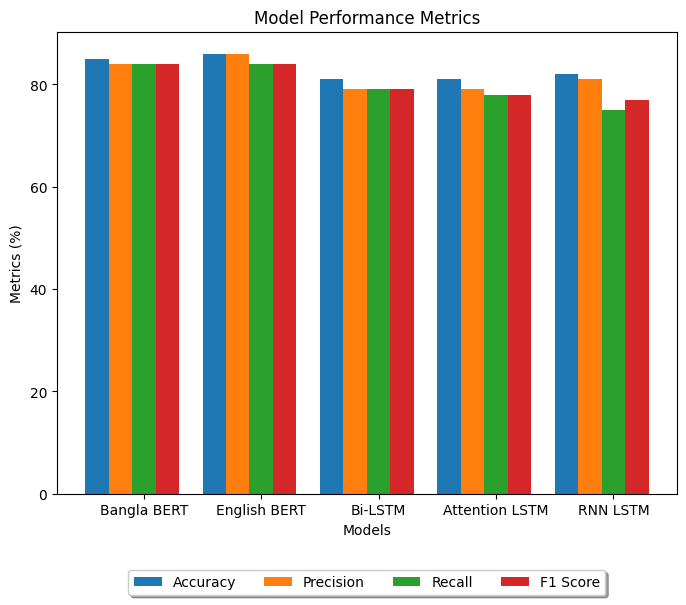

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
model_names = ['Bangla BERT', 'English BERT', 'Bi-LSTM', 'Attention LSTM', 'RNN LSTM']


# Bar width
bar_width = 0.2
bar_positions = np.arange(len(model_names))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar_accuracy = ax.bar(bar_positions - bar_width, accuracy, bar_width, label='Accuracy')
bar_precision = ax.bar(bar_positions, precision, bar_width, label='Precision')
bar_recall = ax.bar(bar_positions + bar_width, recall, bar_width, label='Recall')
bar_f1_score = ax.bar(bar_positions + 2*bar_width, f1_score, bar_width, label='F1 Score')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metrics (%)')
ax.set_title('Model Performance Metrics')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(model_names)

# Move the legend to a blank space outside the bars
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)

# Show the plot
plt.show()
